# Exploratory Data Analysis using Indian Demography details
Indian Demography Analysis using Python

## Table of Contents
1) Data Processing
2) Data Analysis and Visulaization
    i) What is the population distribution across different states in India?


## 1) Data Processing

# Step 1: Libaries neeeded

Optional: In anaconda promt use conda to set up a new environment and install the basic data analyst packages

conda create --name data_analysis python=3.11.4
conda activate data_analysis
conda install pandas numpy matplotlib seaborn jupyter scikit-learn geopandas xlrd


In [1]:
import os
import xlrd as xl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


# Step 2: load the excel file and view it
To load the excel file downloaded from the Indian Census website


In [2]:
# Load Excel file
data = pd.read_excel("D:/Git_Repository/Exploratory_data_analysis_Demography/Data/PCA_HL_2011_Release.xls")

# Display the first few rows of the DataFrame
print(data.head())

   State  District  Level             Name    TRU   No_HH  TOT_HL_P  TOT_HL_M  \
0      0         0  India            India  Total  449787   1773040   1046871   
1      0         0  India            India  Rural  192891    834692    444450   
2      0         0  India            India  Urban  256896    938348    602421   
3      1         0  STATE  JAMMU & KASHMIR  Total    3064     19047     10524   
4      1         0  STATE  JAMMU & KASHMIR  Rural    1441      8199      4465   

   TOT_HL_F    P_06  ...  MARG_AL_0_3_F  MARG_HH_0_3_P  MARG_HH_0_3_M  \
0    726169  270605  ...           5628           3491           1794   
1    390242  157893  ...           5095           2125            973   
2    335927  112712  ...            533           1366            821   
3      8523    2868  ...             75             42             20   
4      3734    1524  ...             55             12              7   

   MARG_HH_0_3_F  MARG_OT_0_3_P  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_P 

# Step 2: Handling Missing Values
Check for missing values in your dataset and decide how to handle them.
There is no null values 

In [3]:
# Check for missing values
print(data.isnull().sum())

State            0
District         0
Level            0
Name             0
TRU              0
                ..
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_P       0
NON_WORK_M       0
NON_WORK_F       0
Length: 90, dtype: int64


# Step 3: Checking the datatypes
checking the data types of all columns
There is no specific error 

In [16]:
# Create a DataFrame
df = pd.DataFrame(data)

# Display the data types of all columns
# Set display option to show all columns
print(df.dtypes)

State              int64
District           int64
Level             object
Name              object
TRU               object
No_HH              int64
TOT_HL_P           int64
TOT_HL_M           int64
TOT_HL_F           int64
P_06               int64
M_06               int64
F_06               int64
P_SC               int64
M_SC               int64
F_SC               int64
P_ST               int64
M_ST               int64
F_ST               int64
P_LIT              int64
M_LIT              int64
F_LIT              int64
P_ILL              int64
M_ILL              int64
F_ILL              int64
TOT_WORK_P         int64
TOT_WORK_M         int64
TOT_WORK_F         int64
MAINWORK_P         int64
MAINWORK_M         int64
MAINWORK_F         int64
MAIN_CL_P          int64
MAIN_CL_M          int64
MAIN_CL_F          int64
MAIN_AL_P          int64
MAIN_AL_M          int64
MAIN_AL_F          int64
MAIN_HH_P          int64
MAIN_HH_M          int64
MAIN_HH_F          int64
MAIN_OT_P          int64


## 2) Data Analysis and Visulaization
    # i) What is the population distribution across different states in India?

C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\650675295.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('coolwarm')


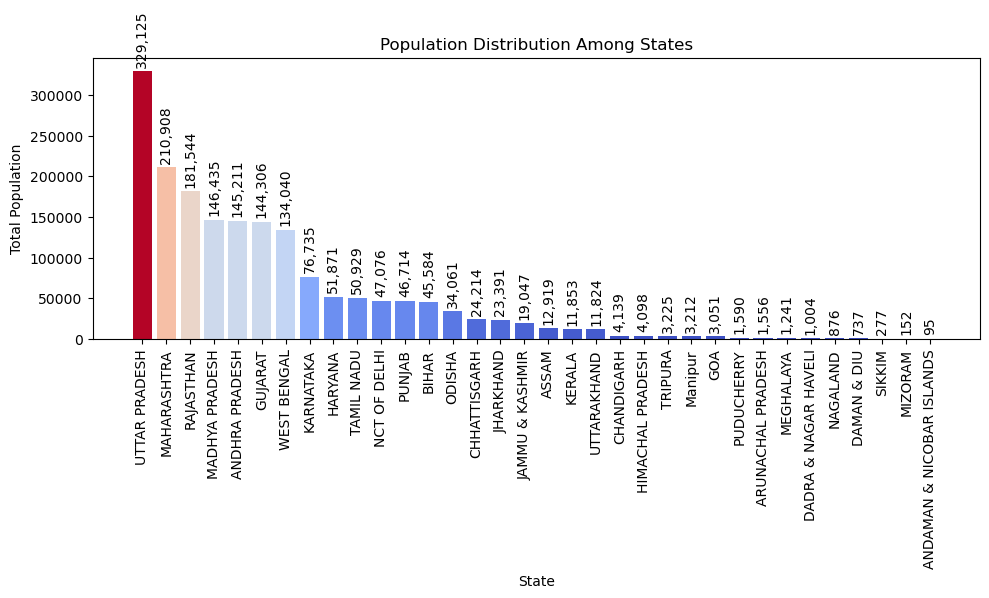

In [27]:

# Filter only the rows with Level='STATE' and TRU=='Total' to focus on states
state_data = data[(data['Level'] == 'STATE') & (data['TRU'] == 'Total')]

# Sort the state_data by population in descending order
state_data_sorted = state_data.sort_values(by='TOT_HL_P', ascending=False)

# Define a color map for the gradient effect
color_map = plt.cm.get_cmap('coolwarm')

# Normalize the population values to the range [0, 1] for color mapping
normalized_population = (state_data_sorted['TOT_HL_P'] - state_data_sorted['TOT_HL_P'].min()) / (state_data_sorted['TOT_HL_P'].max() - state_data_sorted['TOT_HL_P'].min())

# Plot population distribution with gradient colors
plt.figure(figsize=(10, 6))
bars = plt.bar(state_data_sorted['Name'], state_data_sorted['TOT_HL_P'], color=color_map(normalized_population))

# Add shortened labels inside the bars, rotated by 90 degrees
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',  # Format the label with commas for thousands
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', rotation=90)  # Rotate the label by 90 degrees

plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Population Distribution Among States')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()  # Ensure the labels fit nicely
plt.show()


C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\3942651070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Name'] = state_data['Name'].str.title()
C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\3942651070.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('coolwarm')


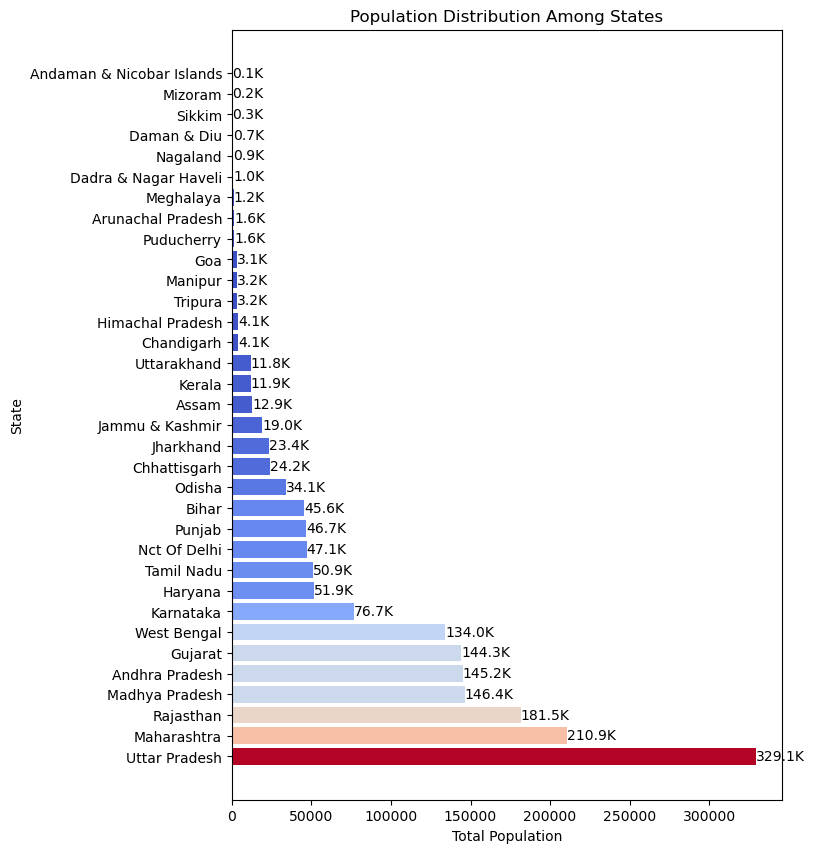

In [31]:
# Filter only the rows with Level='STATE' and TRU=='Total' to focus on states
state_data = data[(data['Level'] == 'STATE') & (data['TRU'] == 'Total')]

# Convert the state names to title case (e.g., "manipur" becomes "Manipur")
state_data['Name'] = state_data['Name'].str.title()

# Sort the state_data by population in descending order
state_data_sorted = state_data.sort_values(by='TOT_HL_P', ascending=False)

# Define a color map for the gradient effect
color_map = plt.cm.get_cmap('coolwarm')

# Normalize the population values to the range [0, 1] for color mapping
normalized_population = (state_data_sorted['TOT_HL_P'] - state_data_sorted['TOT_HL_P'].min()) / (state_data_sorted['TOT_HL_P'].max() - state_data_sorted['TOT_HL_P'].min())

# Increase the figure size and adjust margins to accommodate the labels
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.4, right=0.95)  # Adjust the left and right margins

# Plot population distribution with gradient colors and rotated labels
bars = plt.barh(state_data_sorted['Name'], state_data_sorted['TOT_HL_P'], color=color_map(normalized_population))

# Add shortened labels inside the bars with population in thousands (K abbreviation)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width/1000:.1f}K', ha='left', va='center')

plt.xlabel('Total Population')
plt.ylabel('State')
plt.title('Population Distribution Among States')
plt.show()

    # ii) What is the literacy rate distribution across different states and between genders in India?

C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\1222333646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Name'] = state_data['Name'].str.title()
C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\1222333646.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_LIT_RATE'] = state_data['M_LIT'] + state_data['F_LIT']


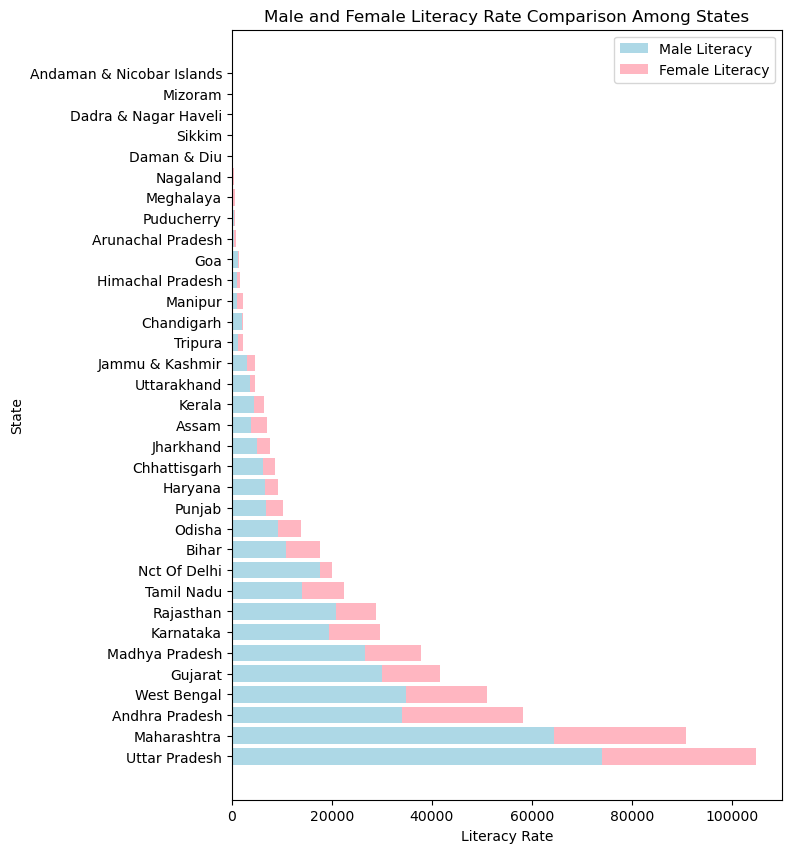

In [32]:
# Filter only the rows with Level='STATE' and TRU=='Total' to focus on states
state_data = data[(data['Level'] == 'STATE') & (data['TRU'] == 'Total')]

# Convert the state names to title case (e.g., "manipur" becomes "Manipur")
state_data['Name'] = state_data['Name'].str.title()

# Sort the state_data by total literacy rate (sum of male and female) in descending order
state_data['Total_LIT_RATE'] = state_data['M_LIT'] + state_data['F_LIT']
state_data_sorted = state_data.sort_values(by='Total_LIT_RATE', ascending=False)

# Increase the figure size and adjust margins to accommodate the labels
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.4, right=0.95)  # Adjust the left and right margins

# Plot stacked bar chart for male and female literacy rates
plt.barh(state_data_sorted['Name'], state_data_sorted['M_LIT'], color='lightblue', label='Male Literacy')
plt.barh(state_data_sorted['Name'], state_data_sorted['F_LIT'], color='lightpink', label='Female Literacy', left=state_data_sorted['M_LIT'])

# Add legend
plt.legend()

plt.xlabel('Literacy Rate')
plt.ylabel('State')
plt.title('Male and Female Literacy Rate Comparison Among States')
plt.show()

C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\971783903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Name'] = state_data['Name'].str.title()
C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\971783903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Pop'] = state_data['TOT_HL_P']
C:\Users\jerin\AppData\Local\Temp\ipykernel_21912\971783903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

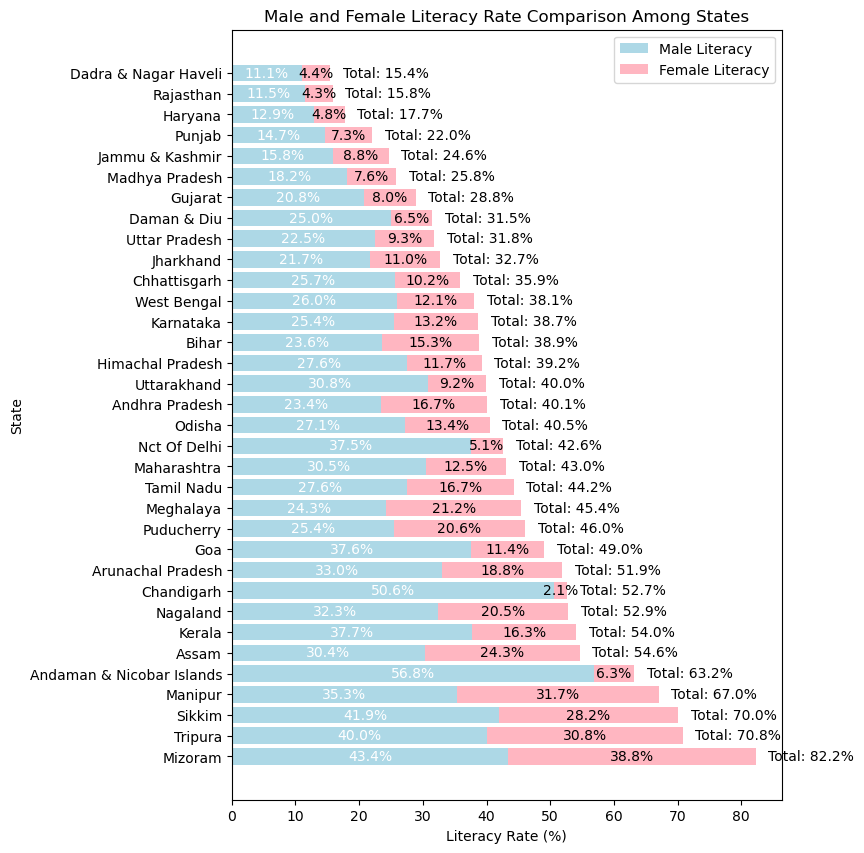

In [45]:
# Filter only the rows with Level='STATE' and TRU=='Total' to focus on states
state_data = data[(data['Level'] == 'STATE') & (data['TRU'] == 'Total')]

# Convert the state names to title case (e.g., "manipur" becomes "Manipur")
state_data['Name'] = state_data['Name'].str.title()

# Calculate total population
state_data['Total_Pop'] = state_data['TOT_HL_P']

# Calculate percentage of male, female, and total literacy rates
state_data['M_LIT_PERCENT'] = (state_data['M_LIT'] / state_data['Total_Pop']) * 100
state_data['F_LIT_PERCENT'] = (state_data['F_LIT'] / state_data['Total_Pop']) * 100
state_data['Total_LIT_PERCENT'] = ((state_data['M_LIT'] + state_data['F_LIT']) / state_data['Total_Pop']) * 100

# Sort the state_data by total literacy rate (sum of male and female) in descending order
state_data_sorted = state_data.sort_values(by='Total_LIT_PERCENT', ascending=False)

# Increase the figure size and adjust margins to accommodate the labels
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.4, right=0.95)  # Adjust the left and right margins

# Plot stacked bar chart for male and female literacy rates
plt.barh(state_data_sorted['Name'], state_data_sorted['M_LIT_PERCENT'], color='lightblue', label='Male Literacy')
plt.barh(state_data_sorted['Name'], state_data_sorted['F_LIT_PERCENT'], color='lightpink', label='Female Literacy', left=state_data_sorted['M_LIT_PERCENT'])

# Add total literacy rate as text labels on the bars
for i, (m_percent, f_percent, total_percent) in enumerate(zip(state_data_sorted['M_LIT_PERCENT'], state_data_sorted['F_LIT_PERCENT'], state_data_sorted['Total_LIT_PERCENT'])):
    plt.text(m_percent / 2, i, f"{m_percent:.1f}%", ha='center', va='center', color='white')
    plt.text(m_percent + f_percent / 2, i, f"{f_percent:.1f}%", ha='center', va='center', color='black')
    plt.text(m_percent + f_percent + 2, i, f"Total: {total_percent:.1f}%", ha='left', va='center', color='black')

# Add legend
plt.legend()

plt.xlabel('Literacy Rate (%)')
plt.ylabel('State')
plt.title('Male and Female Literacy Rate Comparison Among States')
plt.show()